# ch 15_9 분류 모델 성능 측정하기

이전 챕터에서 logistic regression을 이용해서 이진 분류 모델을 만들었습니다. 그리고 분류를 얼마나 잘했는지 accuracy를 측정하였습니다. 그런데 사실 분류 모델의 성능을 좀 더 디테일하게 측정할 수 있는 기법들이 있습니다. 바로 confusion matrix와 ROC curve입니다. 이번 챕터에서는 이런 기법들의 개념과 사용법을 익혀보겠습니다.

## 모델 준비

In [1]:
from utils import load_titanic_dataset
import statsmodels.api as sm

x_train, x_test, y_train, y_test = load_titanic_dataset()
x_train = x_train[["Age", "Fare", "Sex"]]
x_test = x_test[["Age", "Fare", "Sex"]]

In [2]:
x_constant_train = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_constant_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.497790
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  571
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            3
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.2631
Time:                        16:27:39   Log-Likelihood:                -284.24
converged:                       True   LL-Null:                       -385.70
Covariance Type:            nonrobust   LLR p-value:                 9.829e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2986      0.278      4.666      0.000       0.753       1.844
Age           -0.0171      0.

In [72]:
y_train_pred = result.predict(x_constant_train)
x_constant_test = sm.add_constant(x_test, has_constant="add")
y_test_pred = result.predict(x_constant_test) > 0.5

## Confusion Matrix

분류 모형 평가에 많이 사용되는 방법입니다. 이진 분류 모델은 입력 데이터에 대해서 Positive 혹은 Negative로 예측을 내립니다. 이 때, 실제 라벨이 Positive인지 Negative인지에 따라서 4가지 조합이 가능합니다.

|  | Positive (실제 라벨) | Negative(실제 라벨) |
| --- | --- | --- |
| Positive(예측) | TP | FP |
| Negative(예측) | FN | TN |

먼저 예측 라벨이 실제 라벨과 일치할 경우 앞에 True의 약자인 T를 붙여줍니다. 예측 라벨과 실제 라벨이 일치하지 않을 경우에는 False를 나타내는 F를 붙여줍니다. 그 뒤에 예측 라벨이 Positive이면 P, Negative이면 N을 붙여줍니다.

예를들어 예측라벨이 Positive이고 실제 라벨도 Postive라면 True Positive가 됩니다. 만일 예측 라벨이 Negative인데 실제 라벨이 Positive라면 False Negative가 됩니다. 이런 식으로 TP, TN, FP, FN 네 가지 조합이 등장할 수 있습니다.

<Axes: >

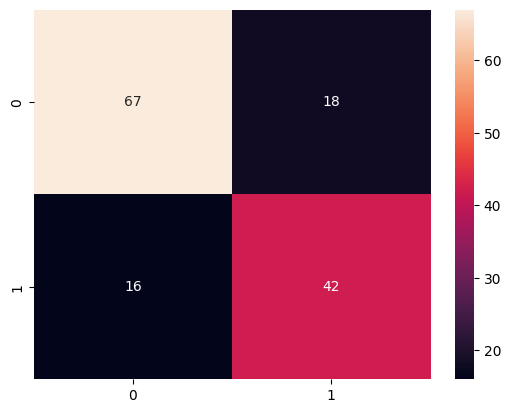

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(
    matrix, 
    annot=True,
)

### Accuracy

분류 모델의 정확도 측정에 가장 많이 사용되는 지표입니다. 전체 데이터 셋에서 실제 라벨과 예측 라벨이 일치한 비율을 계산합니다.

$$TOTAL=TP+TN+FP+FN$$

$$Accuracy=\frac{TP + TN}{TOTAL}=\frac{42+67}{143}\approx0.7622$$


In [74]:
from sklearn.metrics import accuracy_score

print("accuracy:", accuracy_score(y_test, y_test_pred))

accuracy: 0.7622377622377622



정확도는 클래스 간 분포가 균형적인 경우에 유용합니다. 즉, 클래스들의 크기가 비슷한 경우에 적합한 평가 지표입니다. 예를 들어, 생존자와 사망자의 비율이 비슷할 때, 정확도는 좋은 지표가 될 수 있습니다.


### Precision

다음은 Precision, 정밀도입니다. 이는 모델이 Positive라고 예측한 라벨 중에 실제 라벨과 일치한 비율을 측정합니다. 

$$Precision=\frac{TP}{TP + FP}=\frac{42}{42+18}=0.7$$


In [75]:
from sklearn.metrics import precision_score

print("Precision:", precision_score(y_test, y_test_pred))

Precision: 0.7



정밀도는 False Positive(거짓 양성)를 최소화해야 하는 상황에서 중요합니다. 예를 들어, 암 진단 모델에서 실제로는 암이 아닌데 암으로 오진하는 경우를 최소화하고 정확한 양성 결과를 얻기 위해 정밀도를 고려합니다.

### Recall

다음은 Recall, 재현율입니다. 이는 전체 Positive 라벨 중, 모델이 예측해낸 비율을 측정합니다. 실제 Positive인 샘플 수를 구하기 위해서는 TP(실제로 positive이고 모델이 맞춘 수)와 FN(실제로 Negative가 아닌, Positive인데 모델이 Negative라고 예측한 샘플 수)를 더해주어야 합니다. 

$$Recall=\frac{TP}{TP+FN}=\frac{42}{42+16}\approx0.7241$$

In [76]:
from sklearn.metrics import recall_score

print("Recall:", recall_score(y_test, y_test_pred))

Recall: 0.7241379310344828



재현율은 False Negative(거짓 음성)를 최소화해야 하는 상황에서 중요합니다. 즉, 실제로 Positive인데 모델이 Negative로 분류하는 경우를 최소화하고 놓치지 않고 모든 양성 샘플을 찾는데 중점을 둡니다. 예를 들어, 암 진단 모델에서 암인데 암이 아니라고 오진하는 경우를 최소화하기 위해 재현율을 고려합니다.

### F1 score

f1 score는 Precision과 Recall의 조화 평균입니다.

$$F1 Score=\frac{2}{\frac{1}{Precision}+\frac{1}{Recall}}=\frac{2}{\frac{1}{0.7}+\frac{1}{0.7241}}\approx0.7118$$


In [77]:
from sklearn.metrics import f1_score 

print("f1 score:", f1_score(y_test, y_test_pred))

f1 score: 0.711864406779661



클래스 불균형이 심한 데이터셋에서 모델의 성능을 평가할 때 F1 스코어가 유용합니다. F1 스코어는 정밀도와 재현율이 모두 높을 때 가장 높은 값을 가지며, 둘 중 어느 하나라도 낮으면 상대적으로 낮은 값을 가집니다. 따라서 모델이 양성과 음성을 모두 정확하게 처리하는데 중점을 둘 때 F1 스코어를 사용하는 것이 적절합니다.

### 각 지표를 사용해야 하는 상황

- 클래스가 고르게 분포할 때: Accuracy
- 클래스가 고르게 분포하지 않을 때: F1 Score
- 위양성(False Positive)을 최소화 시키는 것이 중요할 때: Precision
- 위음성(False Negative)을 최소화 시키는 것이 주용할 때: Recall

보통 리얼 월드 데이터 셋은 라벨이 고르게 분포하는 경우가 드뭅니다. 때문에 Accuracy 보다는 f1 score가 많이 사용됩니다. 그 외에 애플리케이션의 특성에 따라서 Precision이나 Recall이 사용되기도 합니다.

sklearn의 classification_report 함수를 사용하면 모든 경우에 대해서 계산된 지표들을 편하게 확인할 수 있습니다. 

In [78]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        85
           1       0.70      0.72      0.71        58

    accuracy                           0.76       143
   macro avg       0.75      0.76      0.75       143
weighted avg       0.76      0.76      0.76       143



## ROC curve

### True Positive Rate 

전체 positive 중에 정확히 예측해낸 비율입니다. positive를 기준으로 측정한 recall과 동일하며, Sensitivity라고도 부릅니다.

$$\text{True Positive Rate}=\frac{TP}{TP+FN}$$

### False Positive Rate

전체 negative 중에 Positive라고 잘못 예측한 비율입니다. 이는 1 - True Negative Rate와 동일하며, 1 - Specificity라고도 부릅니다.

$$\text{False Positive Rate}=\frac{FP}{TN+FP}$$

### ROC curve

ROC 곡선은 이러한 이진 분류 모델의 임계값(threshold)을 변화시키면서, 모델의 민감도(Sensitivity)와 1 - 특이도(Specificity)를 시각적으로 나타낸 것입니다. 임계값이란 Positive로 분류하기 위한 기준값이며, accuracy를 측정했을 때에는 0.5로 설정하였습니다. 임계값을 낮추면 모델은 더 쉽게 Positive로 분류하고, 임계값을 높이면 더 보수적으로 Positive로 분류합니다.

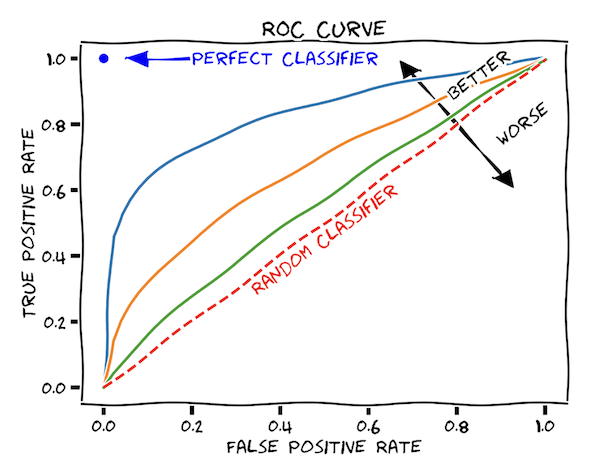

임계값이 0이라고 가정해보겠습니다. 그러면 모든 샘플들이 Negative로 분류되어 TPR과 FPR이 모두 0이 될 것입니다. 반대로 임계값이 1이라고 가정해보겠습니다. 그러면 모든 샘플들이 Positive로 분류되어 TPR과 FPR 모두 1이 될 것입니다. 때문에 ROC curve는 (0,0)에서 시작해서 (1, 1)에서 끝나게 됩니다.

그러면 무작위로 Positive와 Negative를 분류하는 모델을 상상해보겠습니다. 이는 임계값을 어떤 수준으로 설정하든 무작위의 결과를 내려줄 것입니다. 때문에 Random Classifier의 ROC Curve는 (0, 0)과 (1, 1)을 연결한 선분이 됩니다.

그렇다면 성능이 뛰어난 모델을 임계값을 서서히 올려가면서 FPR과 TPR의 변화를 측정한다고 생각해보겠습니다. 뛰어난 모델이라면 Negative를 Positive라고 잘못 예측하는 비율보다 실제 Positive를 정확하게 맞출 비율이 훨씬 높을 겁니다. 때문에 뛰어난 모델의 ROC Curve는 파란색 곡선처럼 위쪽으로 불룩한 형태를 보이게 됩니다. 모델의 성능이 뛰어날 수록 대각선에서 멀어지고, 별로일 수록 대각선에 가까워집니다.

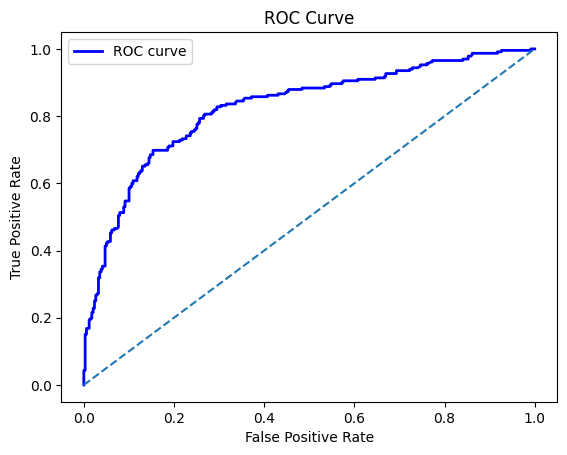

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f"ROC Curve")
plt.legend()

### AUROC

ROC curve의 아래 면적을 계산한 지표입니다. 1에 가까울 수록 성능이 뛰어난 분류 모델입니다. 클래스가 불균형한 상황에서도 객관적인 성능 평가를 제공해 줄 수 있기 때문에 실제 분류 모델의 성능 측정 지표로 많이 사용됩니다.

ROC curve와 AUROC에 대해서 더 궁금하신 분들은 아래 아티클을 참고해주세요.  
https://nittaku.tistory.com/297

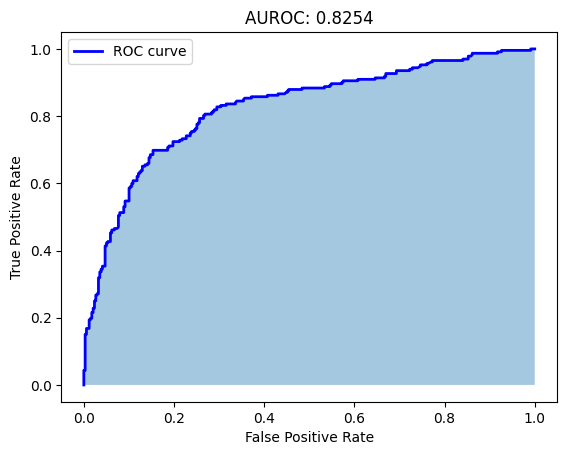

In [111]:
auroc = round(roc_auc_score(y_train, y_train_pred), 4)
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve')
plt.fill_between(fpr, tpr, alpha=0.4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f"AUROC: {auroc}")
plt.legend()

## 정리

이번 챕터에서는 분류 모델의 성능을 측정하는 지표들에 대해서 알아보았습니다. 특히 Accuracy, Precision, Recall, F1 Score, ROC Curve, AUROC의 개념은 면접에서 반드시 물어보는 질문들 중에 하나이니 잘 기억해두시기 바랍니다.